In [1]:
require(ggplot2)

Loading required package: ggplot2



Import the data created in notebook 2

In [2]:
data = read.csv("data.csv", sep='')
data$encoding = as.character(data$encoding)#default R behavior is to attribute factor class to characters variables
data$participant = as.character(data$participant)

# Visualisation

### Aggregating all trials

We can look at the mean RT for the group by aggregating all observed RTs and taking their means

In [3]:
means = aggregate(data$rt, FUN=mean, 
          by=list(ease=data$ease, encoding=data$encoding)) #getting the mean for each experimental cell
means$sd = as.numeric(aggregate(data$rt, FUN=sd, 
          by=list(ease=data$ease, encoding=data$encoding))$x)#getting the standard deviation for experimental cell
means

ease,encoding,x,sd
<int>,<chr>,<dbl>,<dbl>
1,degraded,0.9057628,0.4620312
2,degraded,0.9364114,0.3850384
3,degraded,0.9614395,0.3074781
4,degraded,1.0043702,0.2418967
5,degraded,1.0657101,0.2047668
1,standard,0.7376157,0.3844038
2,standard,0.6062219,0.2443728
3,standard,0.5249270,0.1673628
4,standard,0.4742432,0.1258816


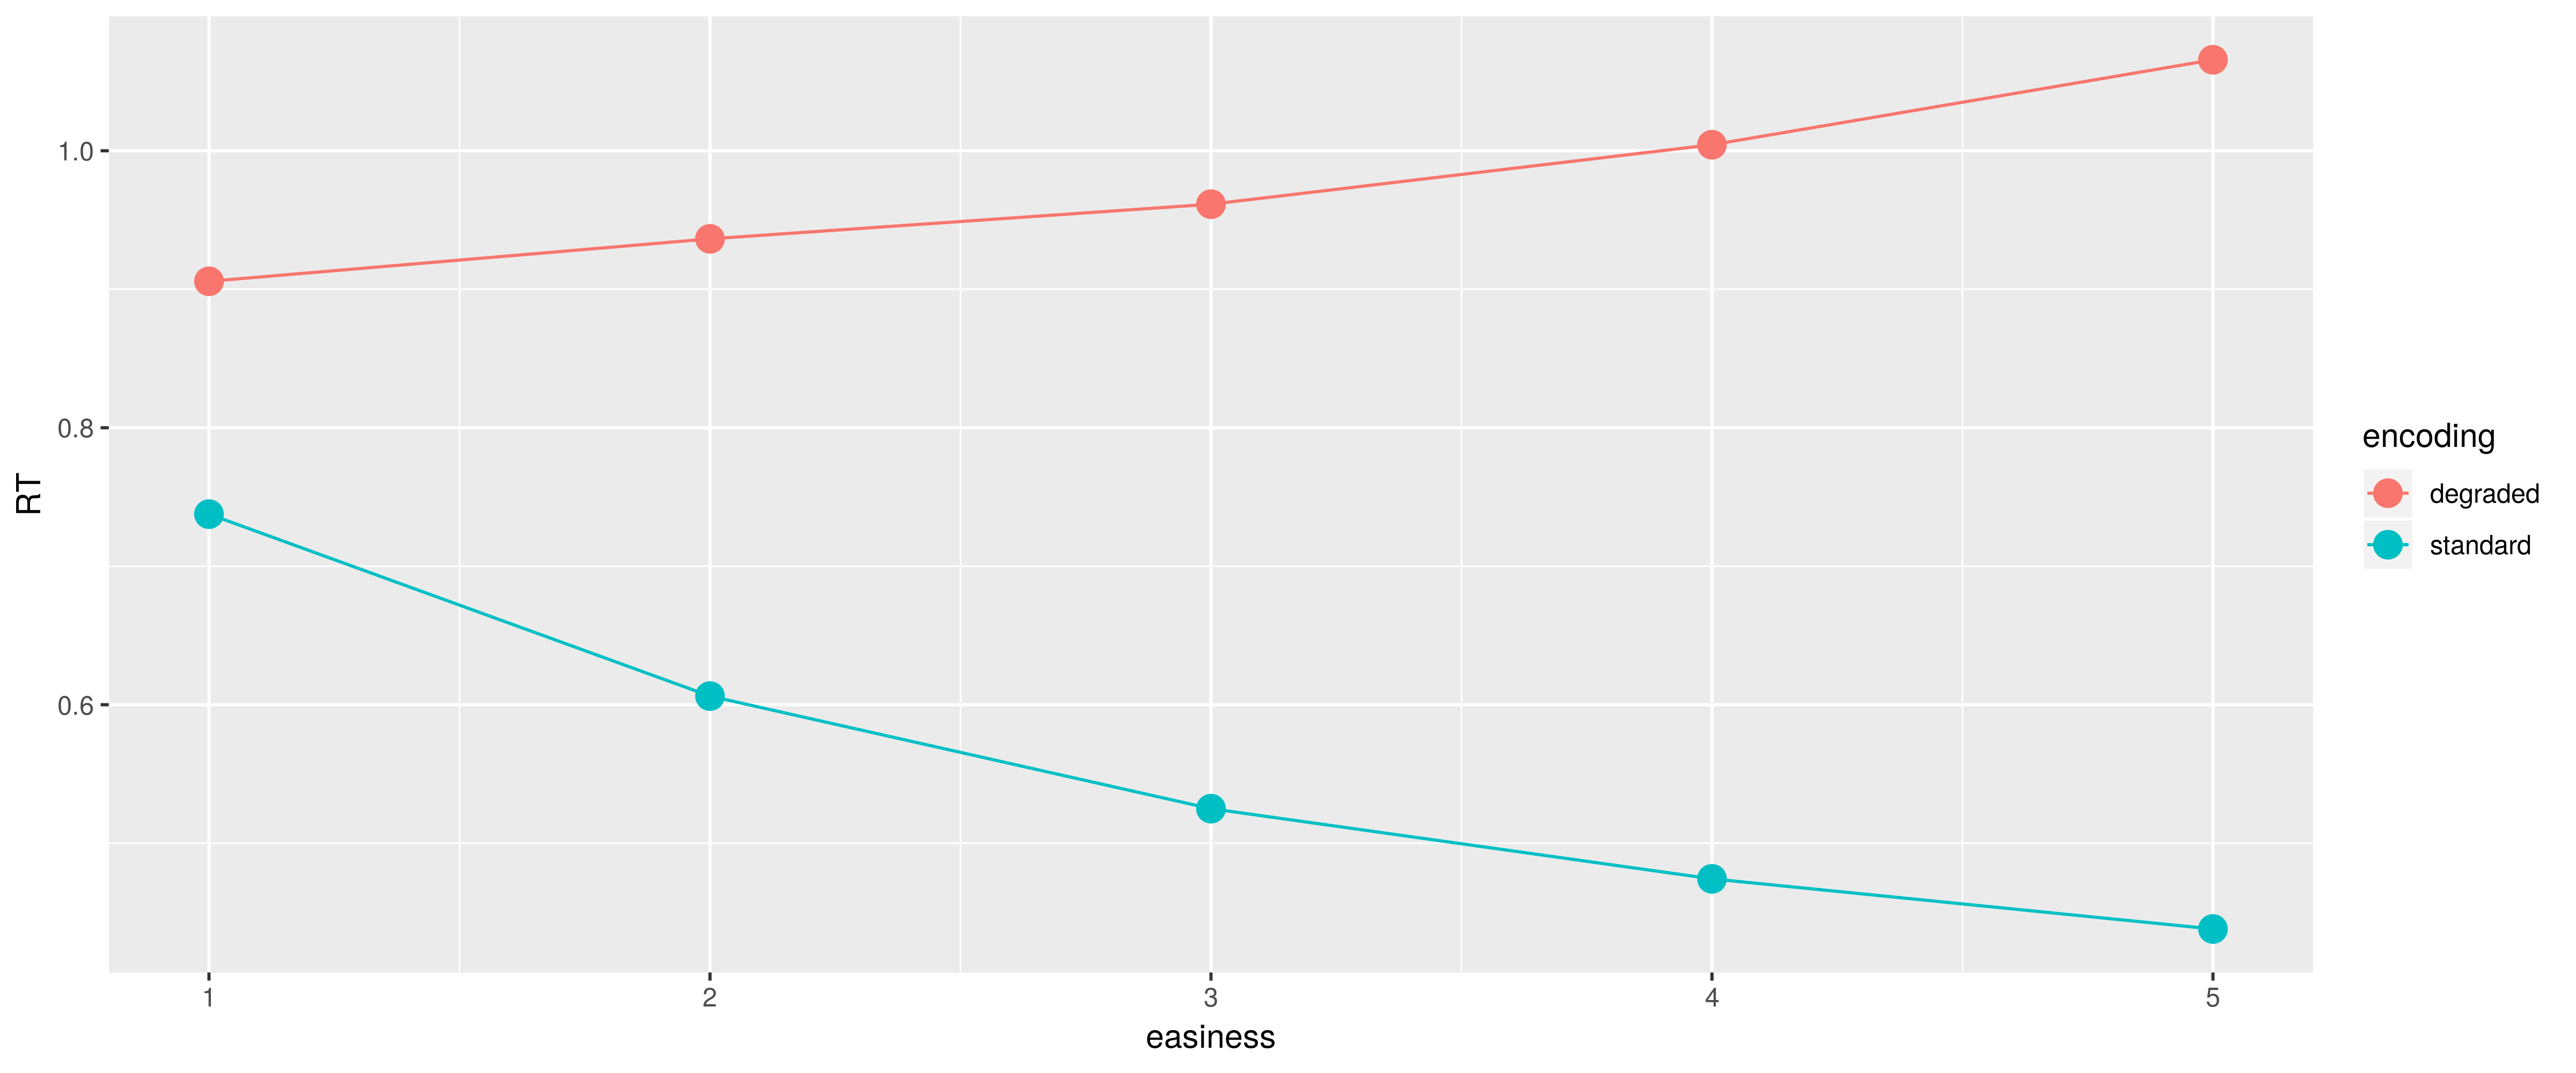

In [4]:
options(repr.plot.width=12, repr.plot.height=5, repr.plot.res = 400)
ggplot(means, aes(x=ease, y=x, color=encoding)) +
  geom_line()+
  geom_point(size=4) +
  scale_size_area() +
  xlab("easiness")+
  ylab("RT")

That does look nice, making the stimulus easier seems to highly fasten the RT of the subjects, but only in the standard condition ?? But we are only looking at the means, is the difference between the points high enough to make inferences ?

### Adding variability of the data

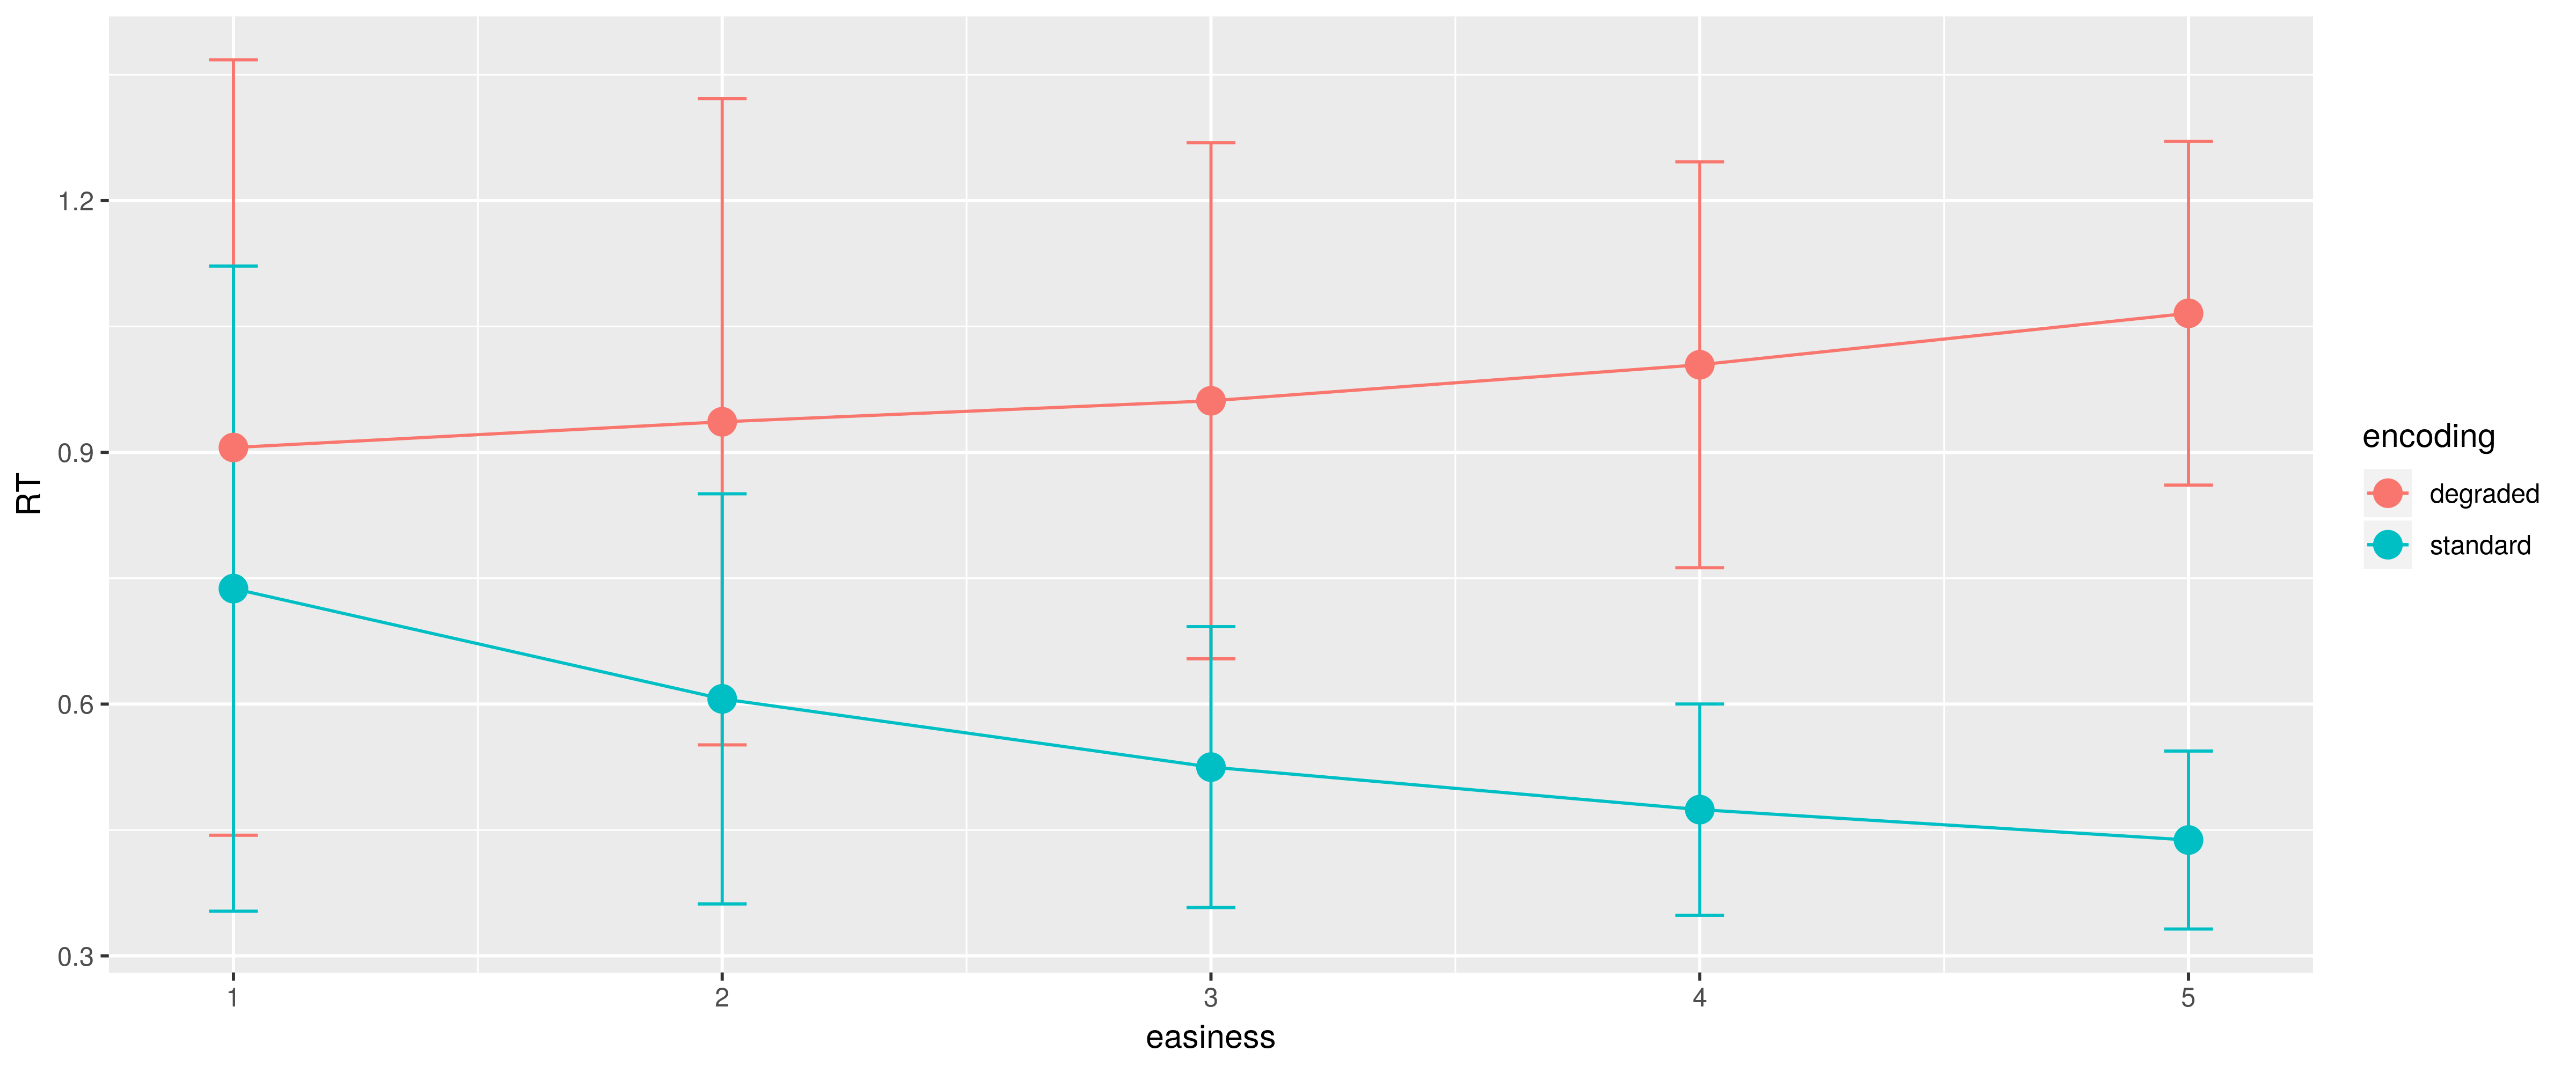

In [5]:
options(repr.plot.width=12, repr.plot.height=5, repr.plot.res = 400)
ggplot(means, aes(x=ease, y=x, color=encoding)) +
  geom_errorbar(aes(ymin=x-sd, ymax=x+sd), width=.1) +
  geom_line()+
  geom_point(size=4) +
  scale_size_area() +
  xlab("easiness")+
  ylab("RT")

Oups ! why ?

### Aggregating first by participant and then the mean of the group

In [6]:
means_bysub = aggregate(data$rt, FUN=mean, 
          by=list(ease=data$ease, encoding=data$encoding, participant = data$participant))#Getting mean RT for each participant X encoding X easiness
head(means_bysub)

,ease,encoding,participant,x
,<int>,<chr>,<chr>,<dbl>
1,1,degraded,1,0.9335367
2,2,degraded,1,0.9821202
3,3,degraded,1,1.0860989
4,4,degraded,1,1.1174465
5,5,degraded,1,1.1920566
6,1,standard,1,0.7640019


In [7]:
means = aggregate(means_bysub$x, FUN=mean, 
          by=list(ease=means_bysub$ease, encoding=means_bysub$encoding))#mean of the means
means$sd = as.numeric(aggregate(means_bysub$x, FUN=sd, 
          by=list(ease=means_bysub$ease, encoding=means_bysub$encoding))$x)#SD of the mean
head(means)

,ease,encoding,x,sd
,<int>,<chr>,<dbl>,<dbl>
1,1,degraded,0.9057628,0.1732847
2,2,degraded,0.9364114,0.1533290
3,3,degraded,0.9614395,0.1203156
4,4,degraded,1.0043702,0.1075068
5,5,degraded,1.0657101,0.1001361
6,1,standard,0.7376157,0.1434277


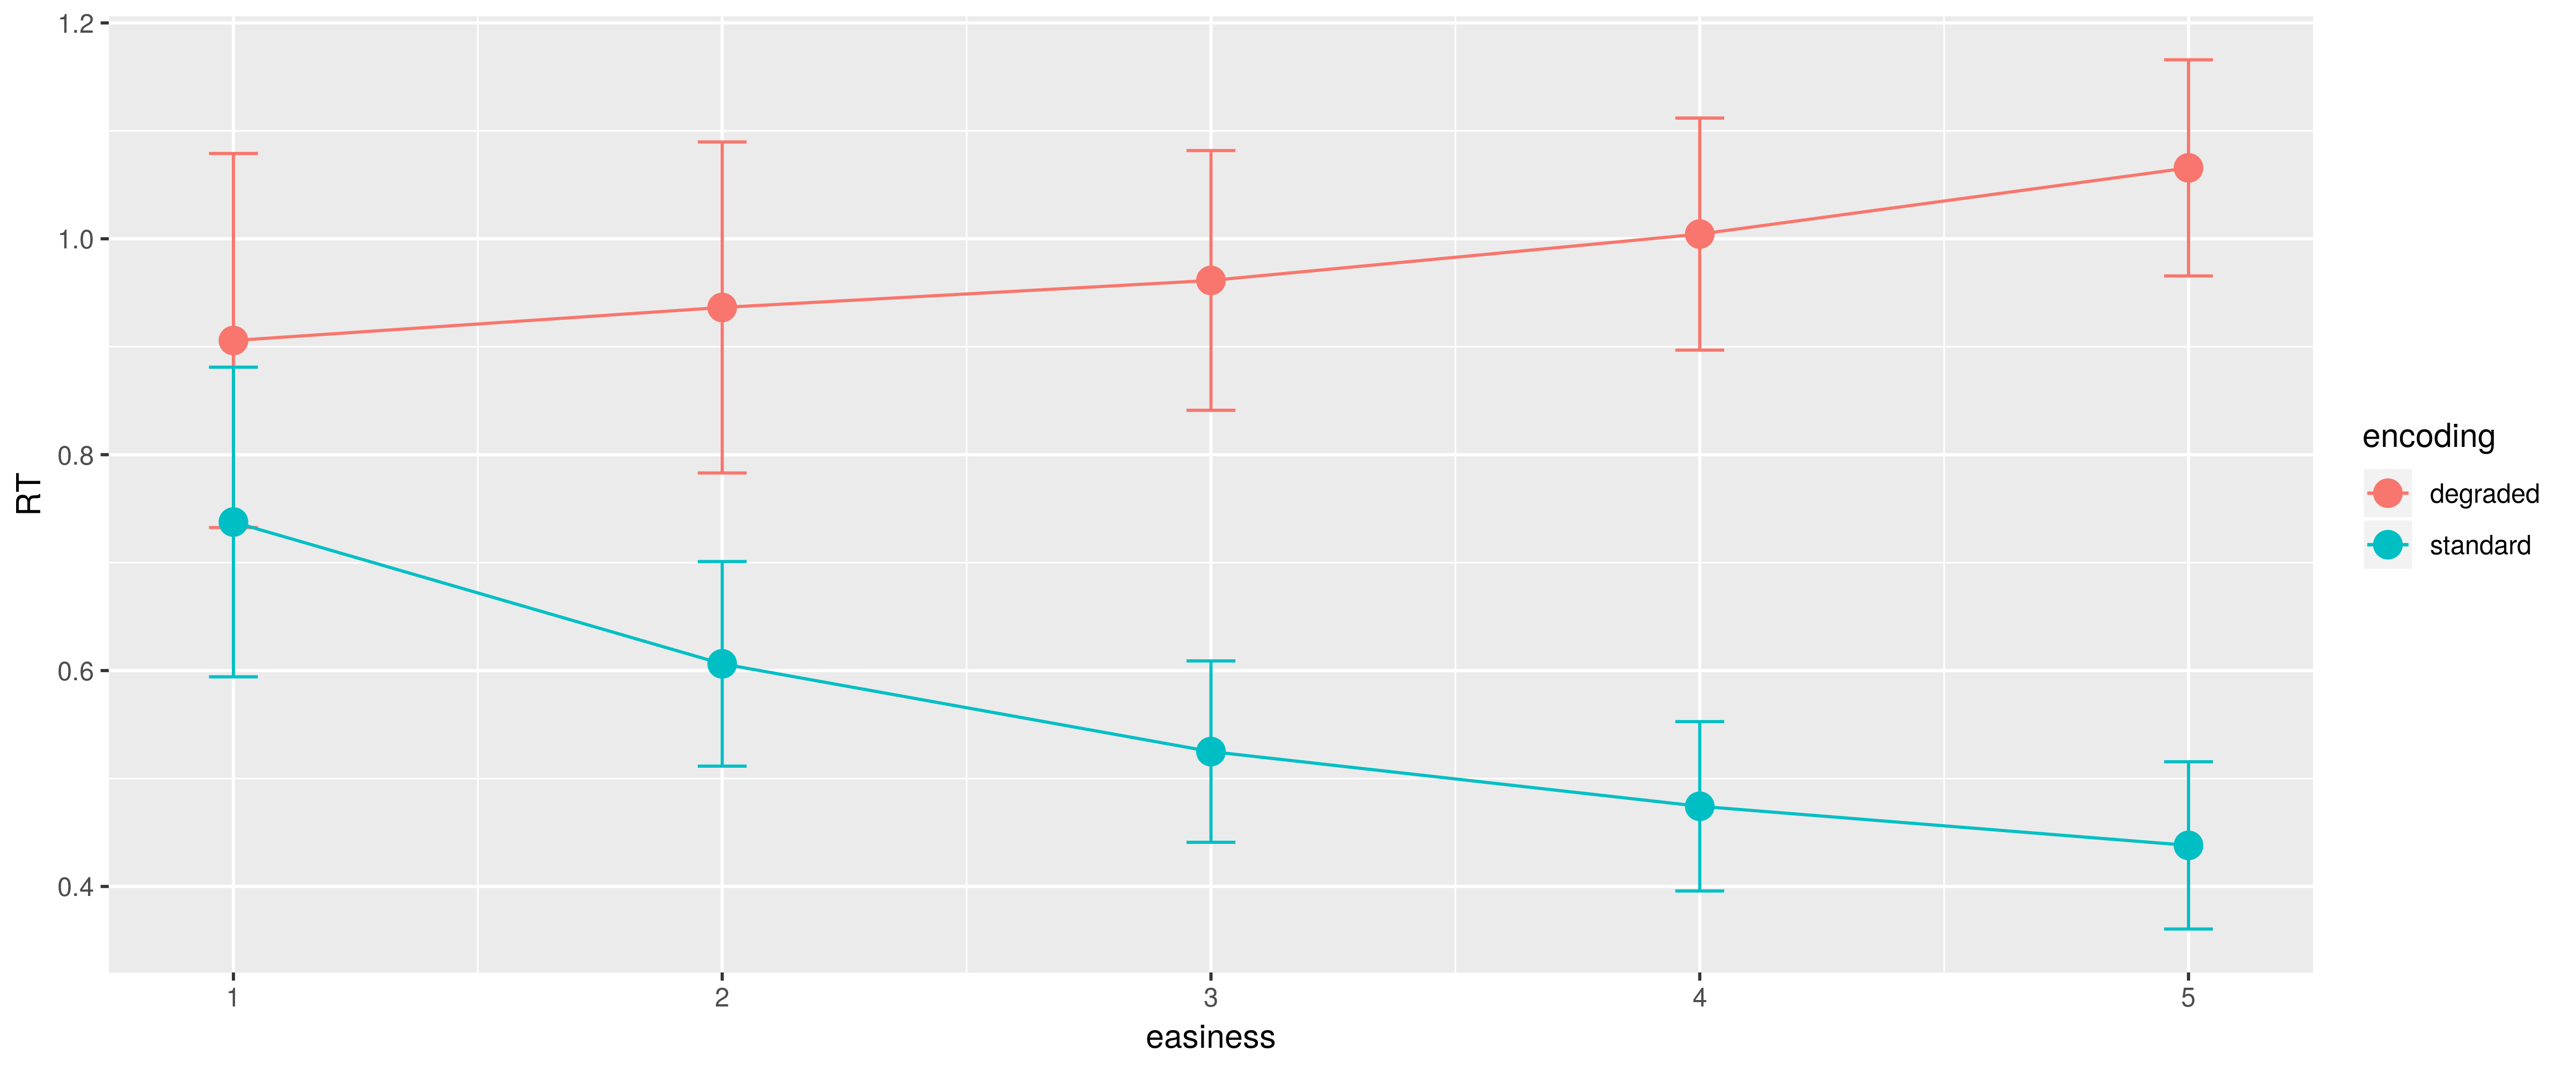

In [8]:
options(repr.plot.width=12, repr.plot.height=5, repr.plot.res = 400)
ggplot(means, aes(x=ease, y=x, color=encoding)) +
  geom_errorbar(aes(ymin=x-sd, ymax=x+sd), width=.1) +
  geom_line()+
  geom_point(size=4) +
  scale_size_area() +
  xlab("easiness")+
  ylab("RT")

That does already look better, now we do not plot the standard deviation for all trials, we are plotting the mean of the mean RTs of the participants ($\overline{T}$) along with the standard deviation of the means of the participants ($\overline{t}_x$). Hence we respect the hierarchy of the data.

Don't forget that other descriptive statistics are available, for simplicity we use mean RT but we could use other statistics (e.g. median, quantiles)


# Linear model

Now we are going to see how we can apply a simple linear model on the mean RT we just extracted

__FYI : What we are going to do is for illustrative purpose, we cannot perform a linear model on data that is nested (i.e. within design) because a linear regression assumes that data points are independent (which they are not as the same participant is tested in 5 stimulus difficulty levels and in the two speed conditions)__

For starter we are going to consider only one predictor, the easiness of the stimuli

In [9]:
means_bysub = aggregate(data$rt, FUN=mean, 
          by=list(ease=data$ease, participant = data$participant))#Getting mean RT for each participant X easiness

In [10]:
mrt.lm <- lm(x ~ ease, data=means_bysub)
print(summary(mrt.lm))


Call:
lm(formula = x ~ ease, data = means_bysub)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25142 -0.06884 -0.00944  0.07418  0.43551 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.816966   0.016809  48.603  < 2e-16 ***
ease        -0.017164   0.005068  -3.387 0.000822 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1133 on 248 degrees of freedom
Multiple R-squared:  0.04421,	Adjusted R-squared:  0.04035 
F-statistic: 11.47 on 1 and 248 DF,  p-value: 0.0008223



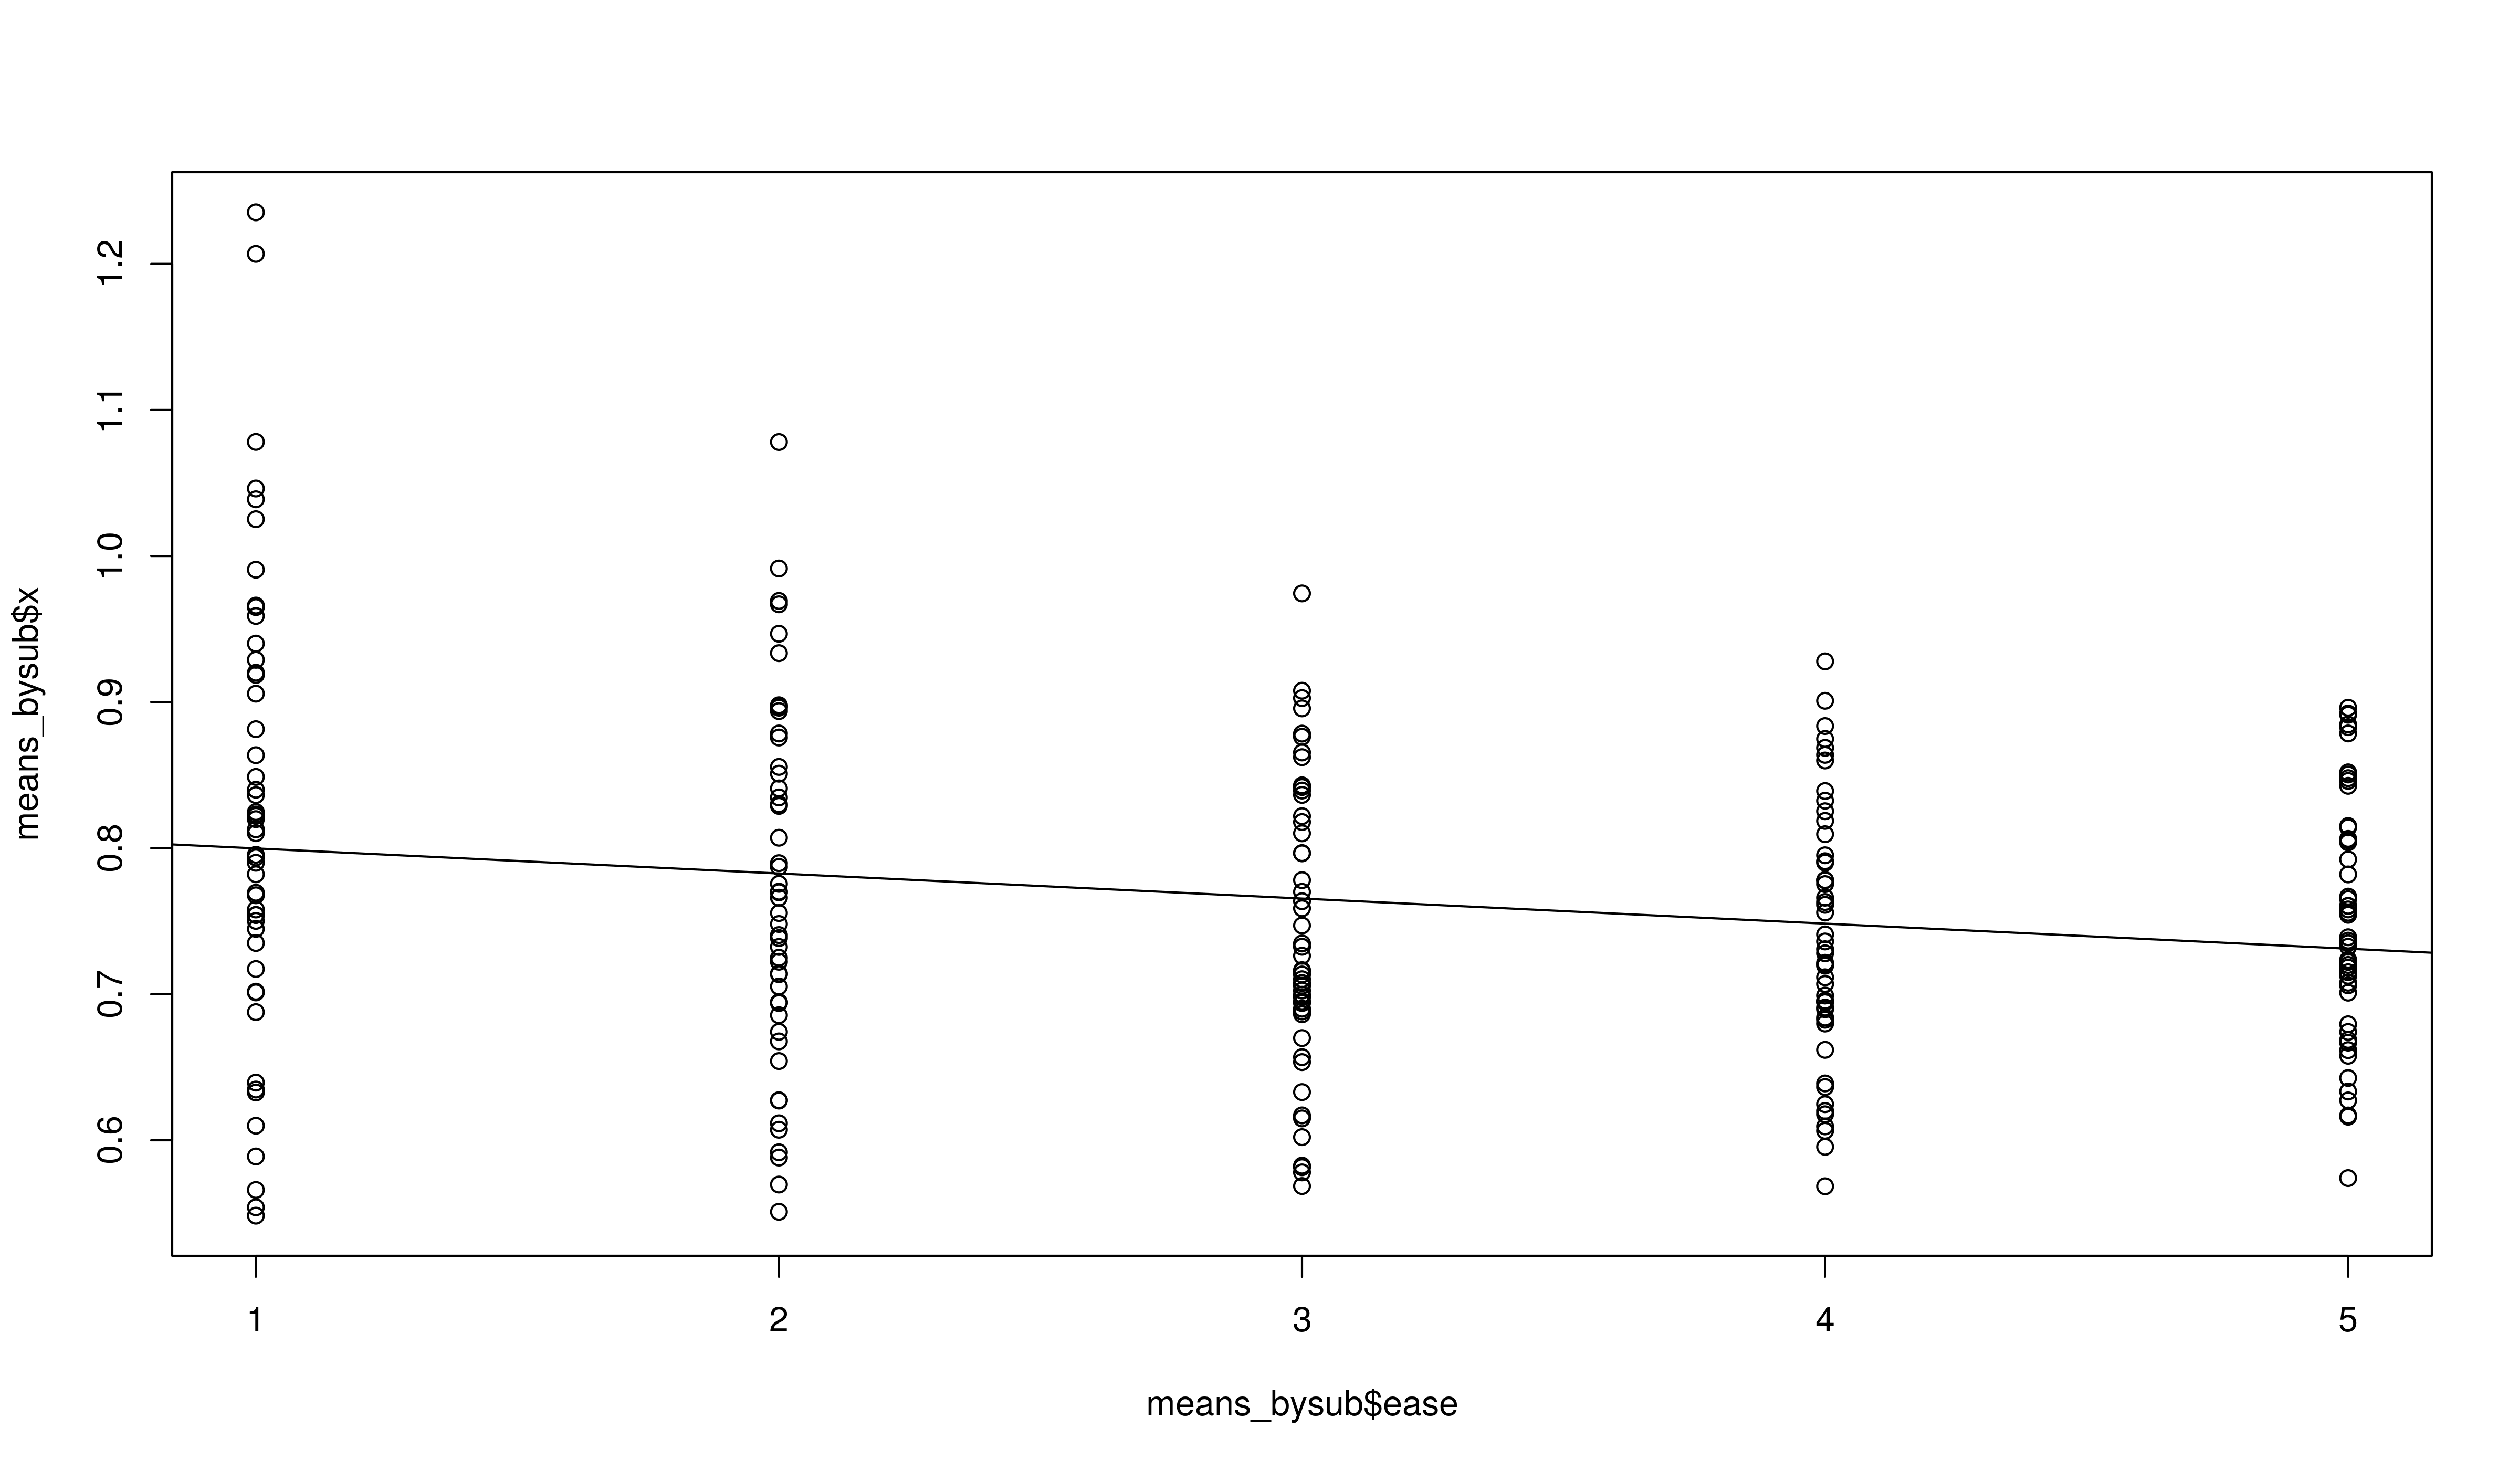

In [11]:
options(repr.plot.width=12, repr.plot.height=7, repr.plot.res = 400)

plot(means_bysub$ease,means_bysub$x)
abline(mrt.lm)

But the intercept represent the predicted rt value when easiness is at zero, which is not really interpretable.

In [12]:
means_bysub$ease = means_bysub$ease-3#this centers the predictor so that the mid contrast is now = to 0

In [13]:
mrt.lm <- lm(x ~ ease, data=means_bysub)
print(summary(mrt.lm))


Call:
lm(formula = x ~ ease, data = means_bysub)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25142 -0.06884 -0.00944  0.07418  0.43551 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.765474   0.007167 106.800  < 2e-16 ***
ease        -0.017164   0.005068  -3.387 0.000822 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1133 on 248 degrees of freedom
Multiple R-squared:  0.04421,	Adjusted R-squared:  0.04035 
F-statistic: 11.47 on 1 and 248 DF,  p-value: 0.0008223



Now the intercept is the predicted RT when the easiness is at mid-level, note that the slope did not change

## Doing the same with the encoding predictor

In [14]:
means_bysub = aggregate(data$rt, FUN=mean, 
          by=list(encoding=data$encoding, participant = data$participant))

In [15]:
mrt.lm <- lm(x ~ encoding, data=means_bysub)
print(summary(mrt.lm))


Call:
lm(formula = x ~ encoding, data = means_bysub)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.21335 -0.06859 -0.00660  0.08457  0.32832 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.97474    0.01524   63.98   <2e-16 ***
encodingstandard -0.41853    0.02155  -19.42   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1077 on 98 degrees of freedom
Multiple R-squared:  0.7938,	Adjusted R-squared:  0.7917 
F-statistic: 377.3 on 1 and 98 DF,  p-value: < 2.2e-16



But what do the coefficients mean ?? I just used the default contrast coding of R.

### Recoding the encoding factor

In [16]:
means_bysub$encoding = ifelse(means_bysub$encoding == "standard", 0, 1)#now Standard = 0 and Speed = 1


In [17]:
mrt.lm <- lm(x ~ encoding, data=means_bysub)
print(summary(mrt.lm))


Call:
lm(formula = x ~ encoding, data = means_bysub)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.21335 -0.06859 -0.00660  0.08457  0.32832 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.55621    0.01524   36.51   <2e-16 ***
encoding     0.41853    0.02155   19.42   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1077 on 98 degrees of freedom
Multiple R-squared:  0.7938,	Adjusted R-squared:  0.7917 
F-statistic: 377.3 on 1 and 98 DF,  p-value: < 2.2e-16



The slope remains the same but the intercept changed, we just moved from the default R behavior (first factor as 0) by considering that the standard condition should be coded as 0.

We could also be interested in the difference between both condition rather than defining one of them as standard

In [18]:
means_bysub$encoding = ifelse(means_bysub$encoding == 0, -1, 1)#now Standard = -1 and Speed = 1


In [19]:
mrt.lm <- lm(x ~ encoding, data=means_bysub)
print(summary(mrt.lm))


Call:
lm(formula = x ~ encoding, data = means_bysub)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.21335 -0.06859 -0.00660  0.08457  0.32832 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.76547    0.01077   71.05   <2e-16 ***
encoding     0.20926    0.01077   19.42   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1077 on 98 degrees of freedom
Multiple R-squared:  0.7938,	Adjusted R-squared:  0.7917 
F-statistic: 377.3 on 1 and 98 DF,  p-value: < 2.2e-16



Now the intercept is the mean of both modalities and the slope the difference to add or subtract to this mean to get the mean RT for degraded or standard condition.

For more information on the coding strategies see : https://www.sciencedirect.com/science/article/pii/S0749596X19300695

## Adding both predictors, aka multiple regression, without interaction

In [20]:
means_bysub = aggregate(data$rt, FUN=mean, 
          by=list(encoding=data$encoding, ease=data$ease, participant = data$participant))
means_bysub$ease = means_bysub$ease-3
means_bysub$encoding = ifelse(means_bysub$encoding == "standard", 0, 1)

In [21]:
mrt.lm <- lm(x ~ ease + encoding, data=means_bysub)
print(summary(mrt.lm))


Call:
lm(formula = x ~ ease + encoding, data = means_bysub)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42137 -0.09081 -0.01462  0.08928  0.51938 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.556209   0.009023  61.641  < 2e-16 ***
ease        -0.017164   0.004512  -3.804  0.00016 ***
encoding     0.418530   0.012761  32.798  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1427 on 497 degrees of freedom
Multiple R-squared:  0.6869,	Adjusted R-squared:  0.6856 
F-statistic: 545.1 on 2 and 497 DF,  p-value: < 2.2e-16



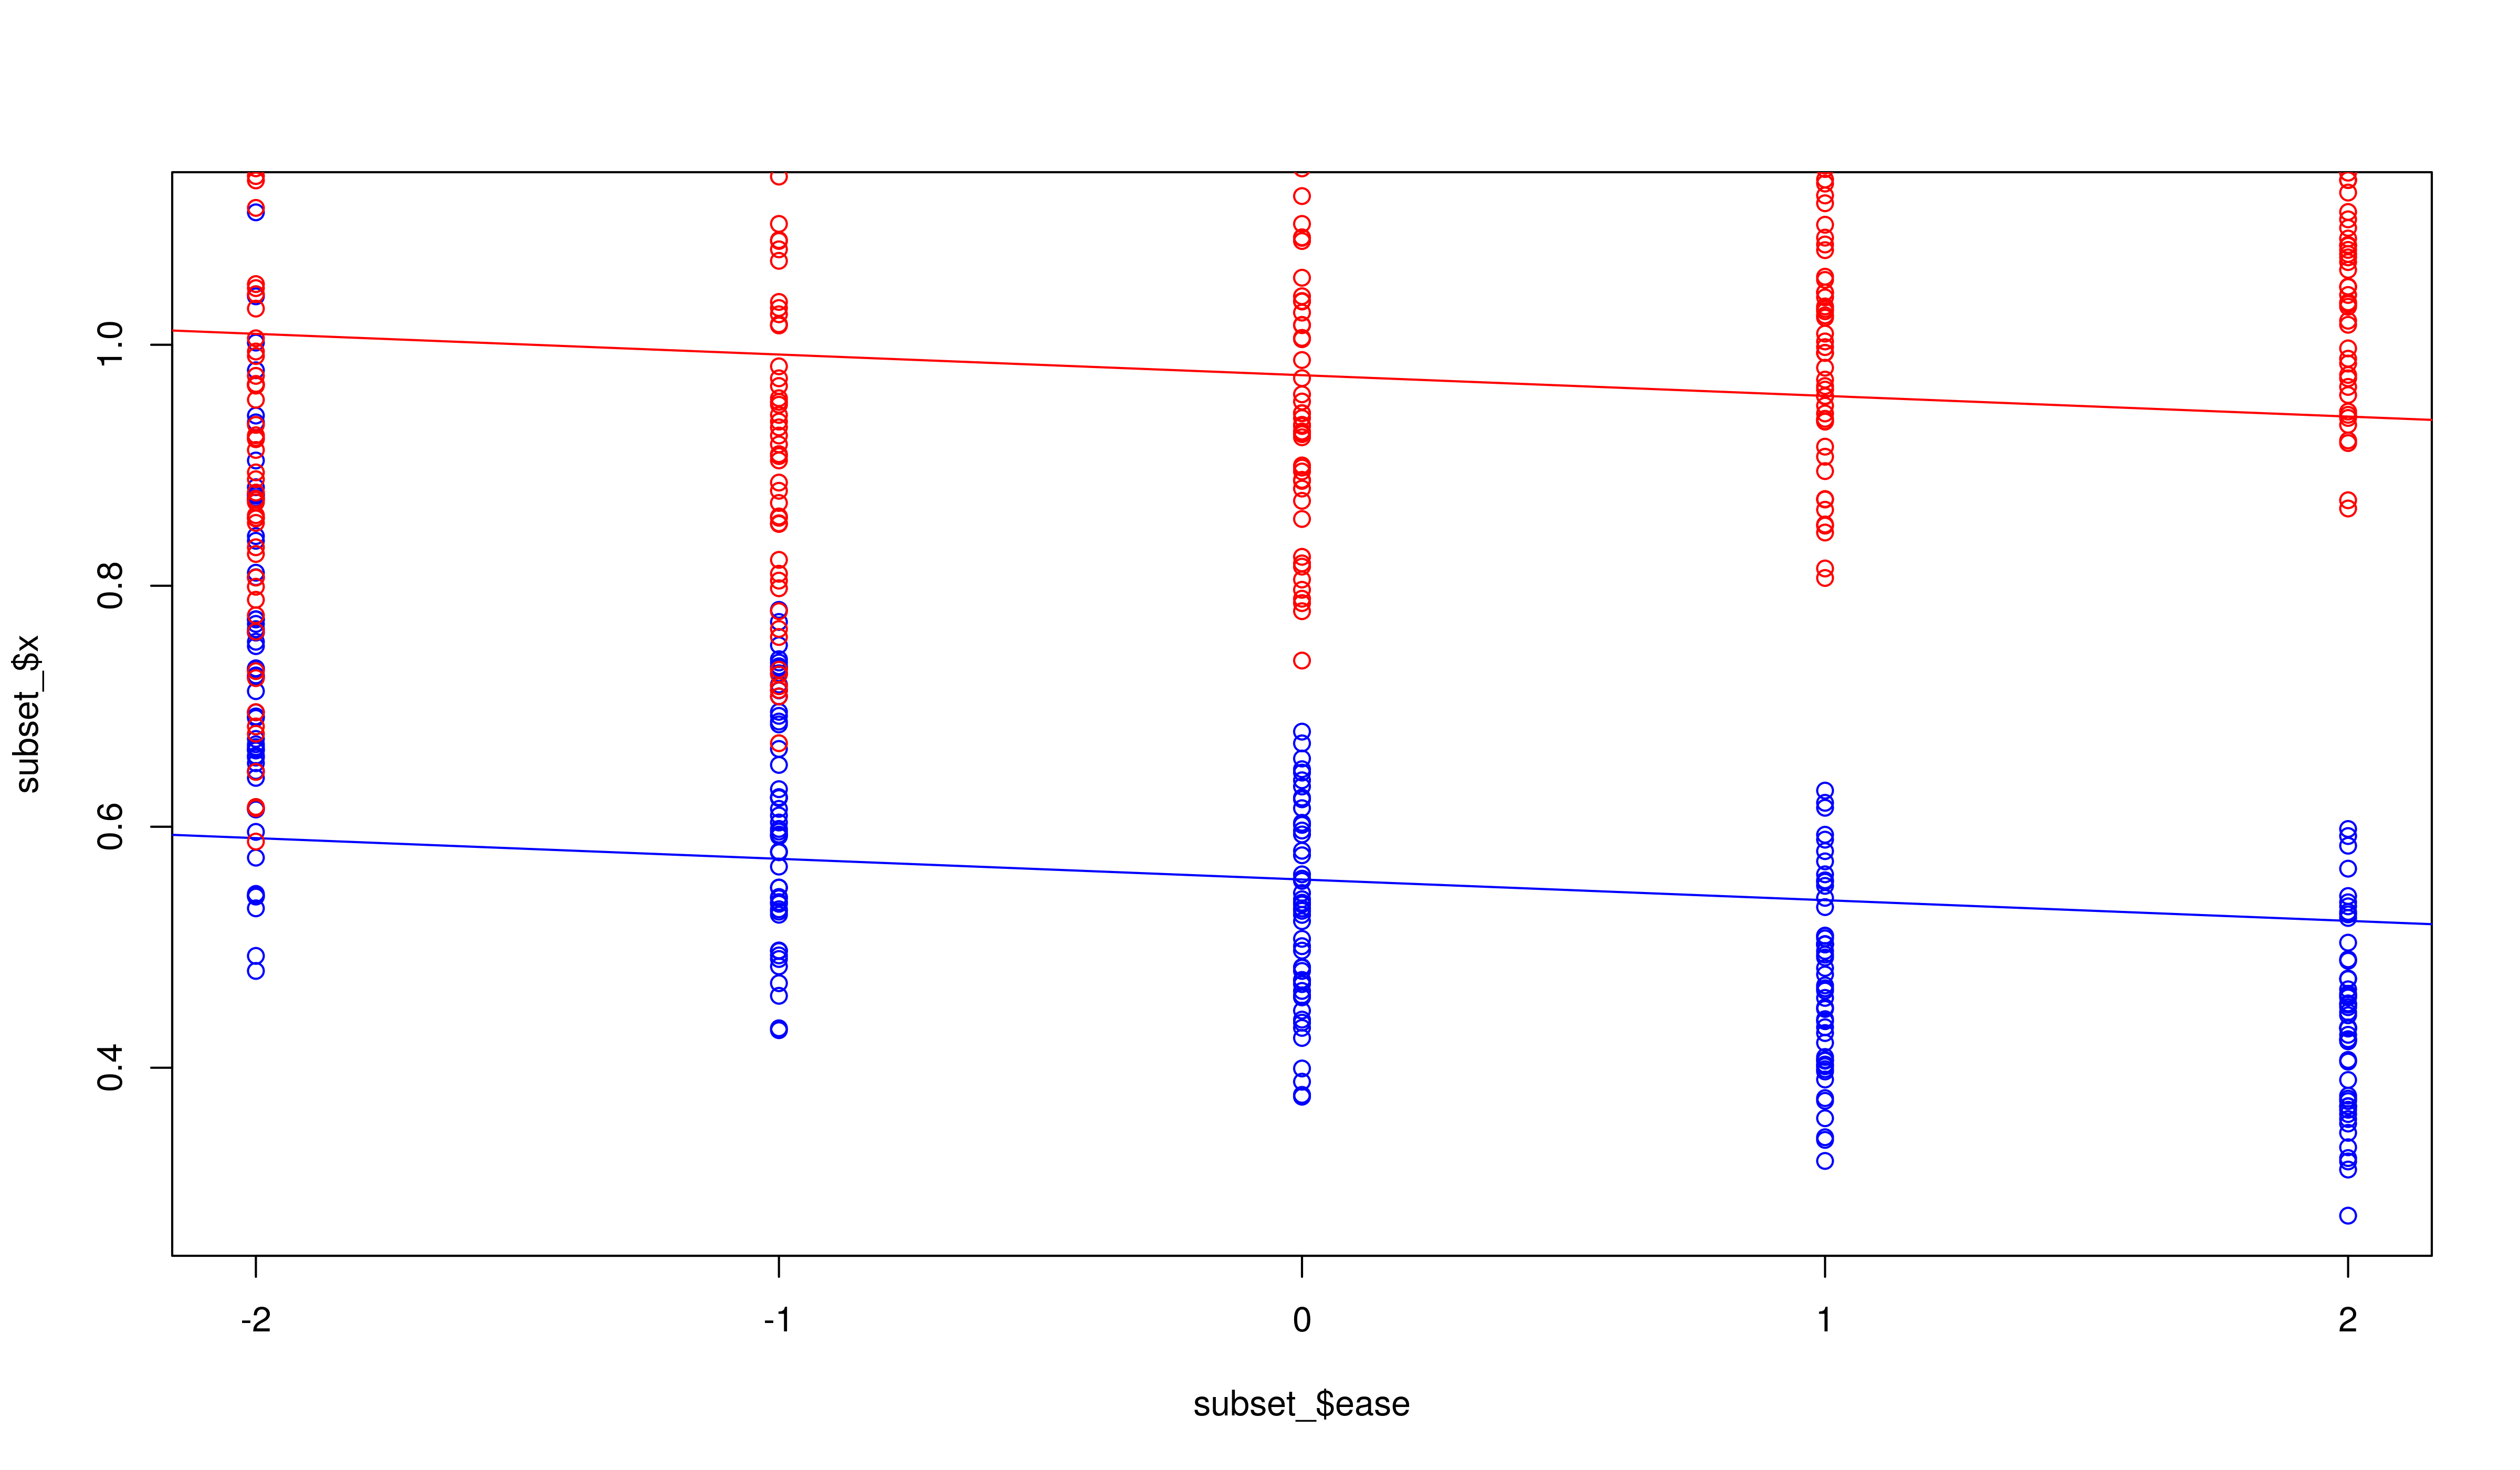

In [22]:
subset_ = means_bysub[means_bysub$encoding == 0,]
plot(subset_$ease,subset_$x, col="blue")
abline(mrt.lm$coefficients["(Intercept)"], mrt.lm$coefficients["ease"], col="blue")

subset_ = means_bysub[means_bysub$encoding == 1,]
points(subset_$ease,subset_$x, col="red")
abline(mrt.lm$coefficients["(Intercept)"]+mrt.lm$coefficients["encoding"], mrt.lm$coefficients["ease"], col="red")

The slope of contrast does not change with encoding contrary to what we could have thought based on the plot of the means. But this is because we did not allow both factors to interact, so the computed slope does not really reflect neither of our two encoding modalities


## Multiple regression with interaction

In [23]:
means_bysub = aggregate(data$rt, FUN=mean, 
          by=list(encoding=data$encoding, ease=data$ease, participant = data$participant))
means_bysub$ease = means_bysub$ease-3
means_bysub$encoding = ifelse(means_bysub$encoding == "standard", 0, 1)


In [24]:
mrt.lm <- lm(x ~ ease * encoding, data=means_bysub)
print(summary(mrt.lm))


Call:
lm(formula = x ~ ease * encoding, data = means_bysub)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30947 -0.07981 -0.00659  0.07057  0.53325 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.556209   0.007506   74.10   <2e-16 ***
ease          -0.073114   0.005308  -13.78   <2e-16 ***
encoding       0.418530   0.010615   39.43   <2e-16 ***
ease:encoding  0.111899   0.007506   14.91   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1187 on 496 degrees of freedom
Multiple R-squared:  0.7838,	Adjusted R-squared:  0.7825 
F-statistic: 599.2 on 3 and 496 DF,  p-value: < 2.2e-16



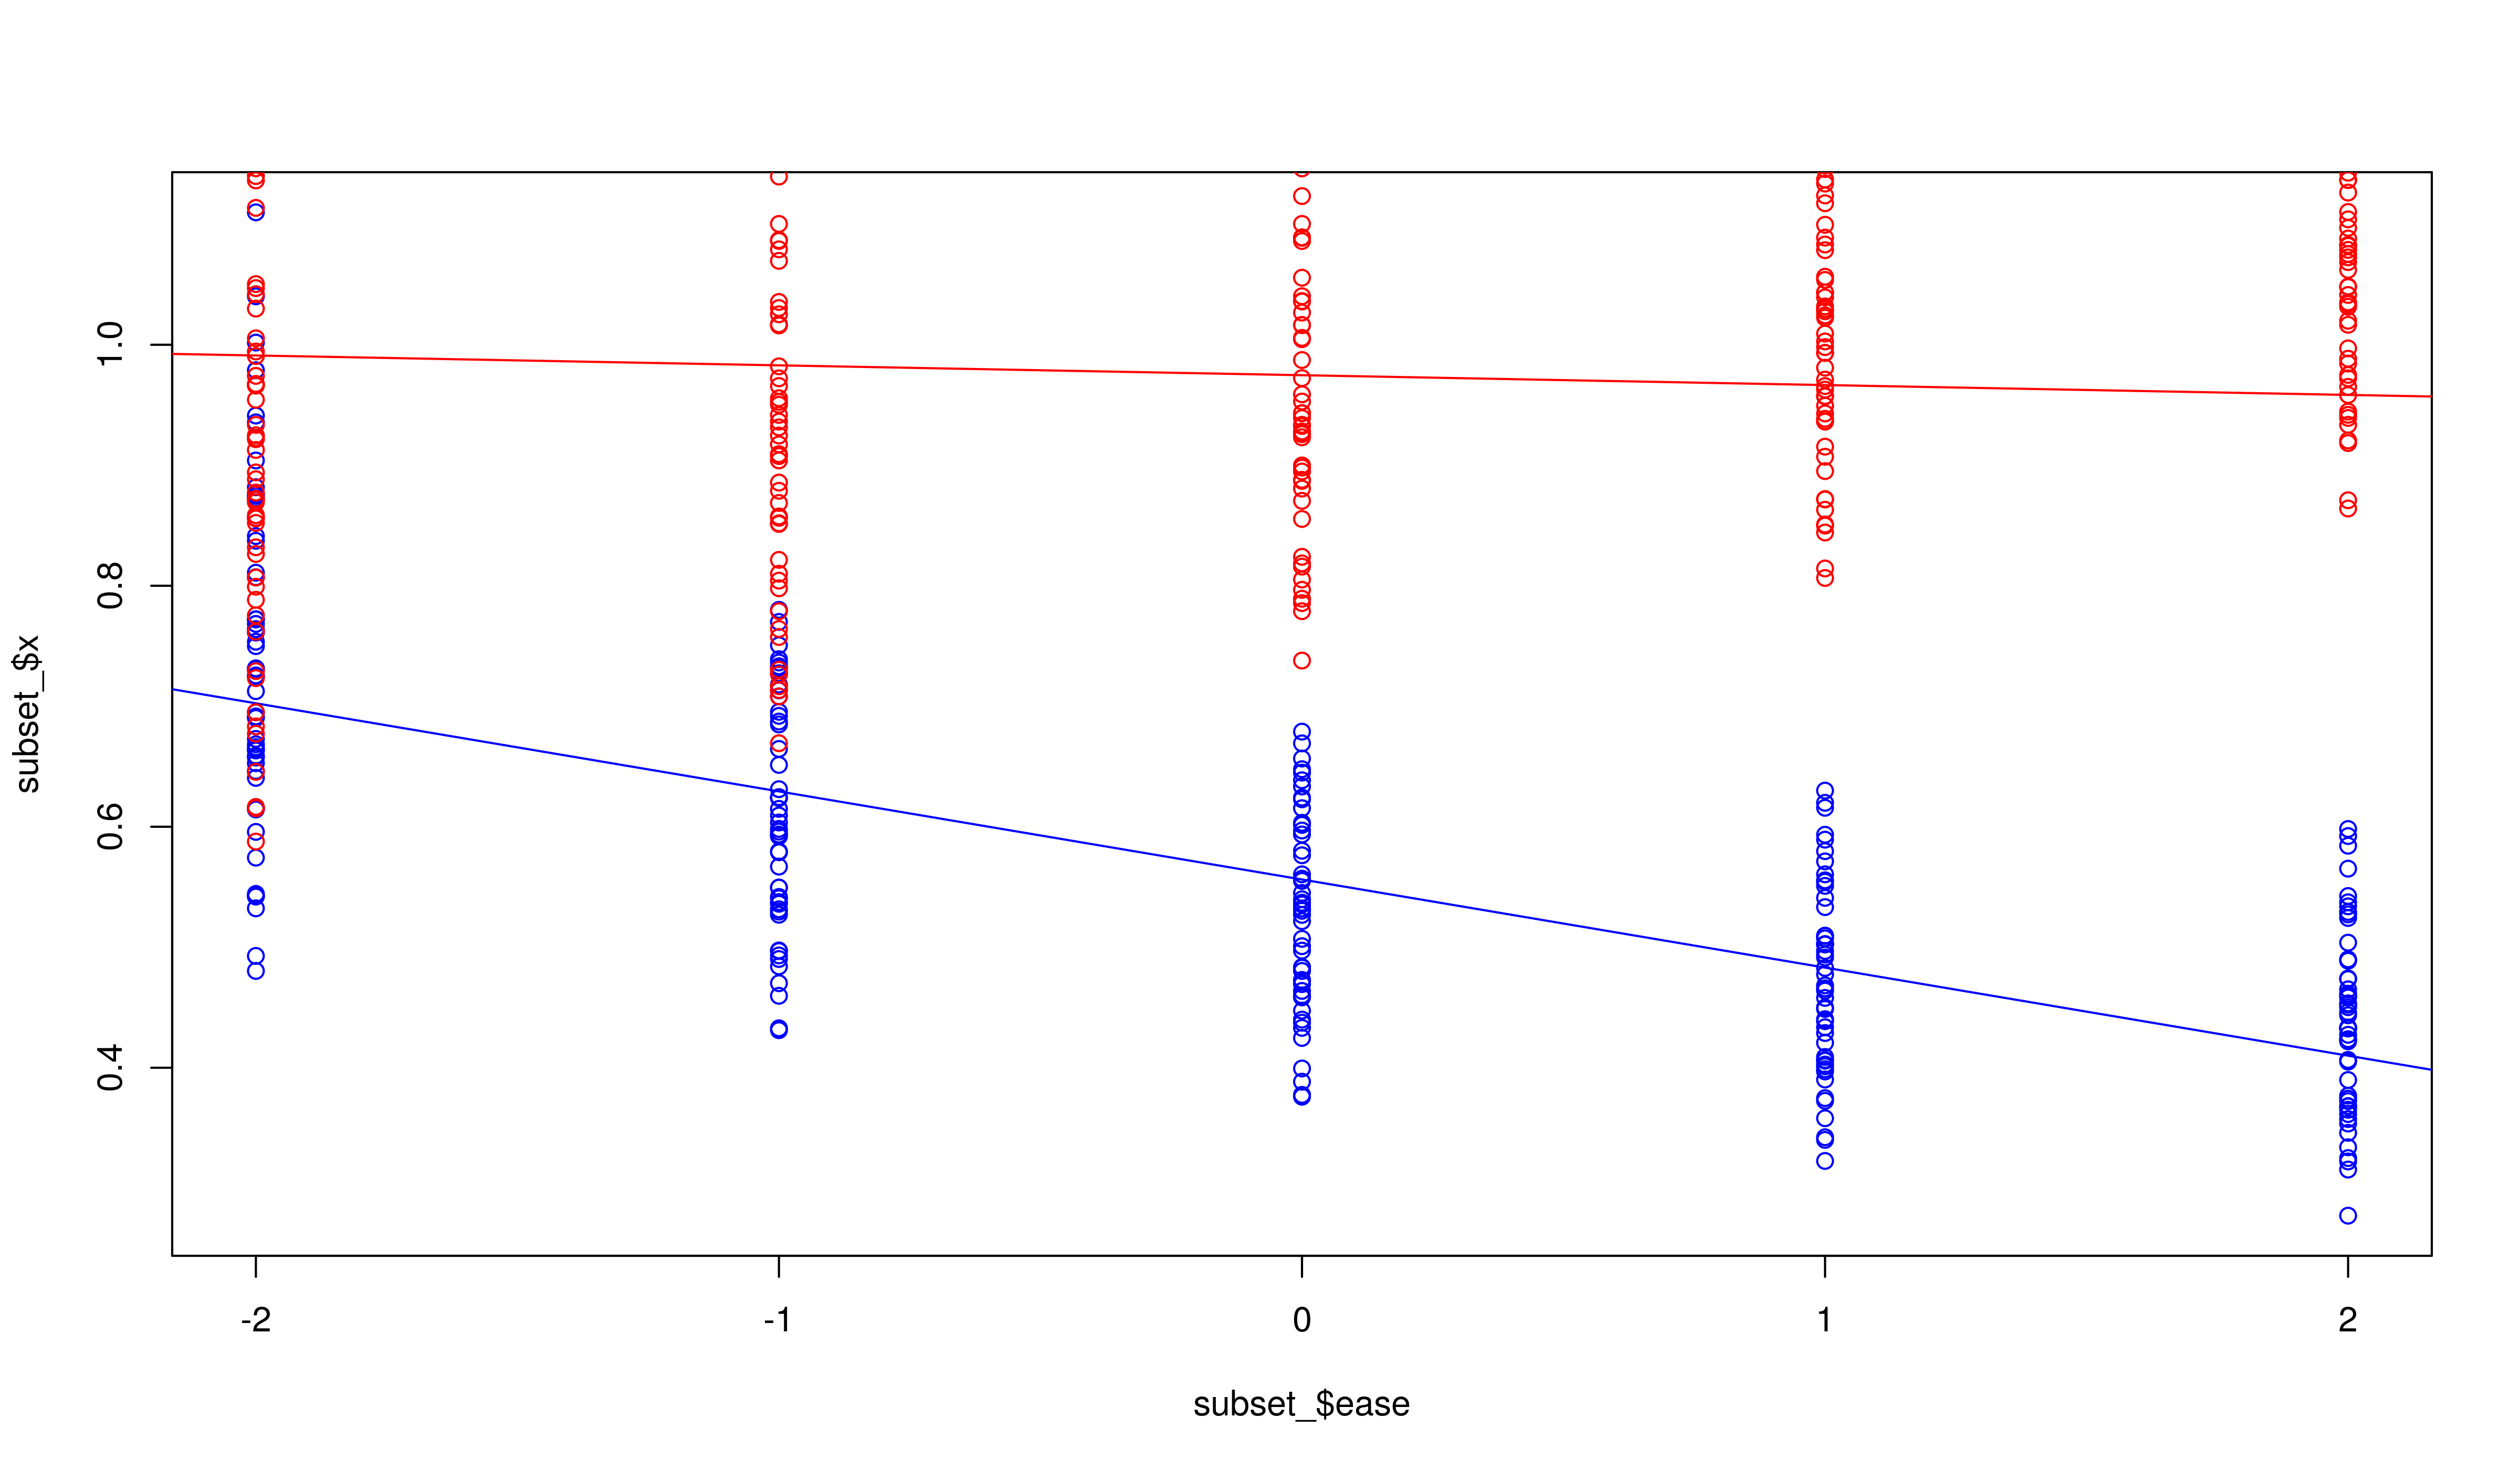

In [25]:
subset_ = means_bysub[means_bysub$encoding == 0,]
plot(subset_$ease,subset_$x, col="blue")
abline(mrt.lm$coefficients["(Intercept)"], mrt.lm$coefficients["ease"], col="blue")

subset_ = means_bysub[means_bysub$encoding == 1,]
points(subset_$ease,subset_$x, col="red")
abline(mrt.lm$coefficients["(Intercept)"]+mrt.lm$coefficients["encoding"], mrt.lm$coefficients["ease"]*mrt.lm$coefficients["ease:encoding"], col="red")

Now we see slopes that are congruent with what we see in the raw data. A hidh effect in the standard condition but a low-to-null effect in the degraded condition

# Assumptions check

We have to check wether we respect the assumptions of our linear model. I outline two of them, normality of the residuals and heteroscedasticity

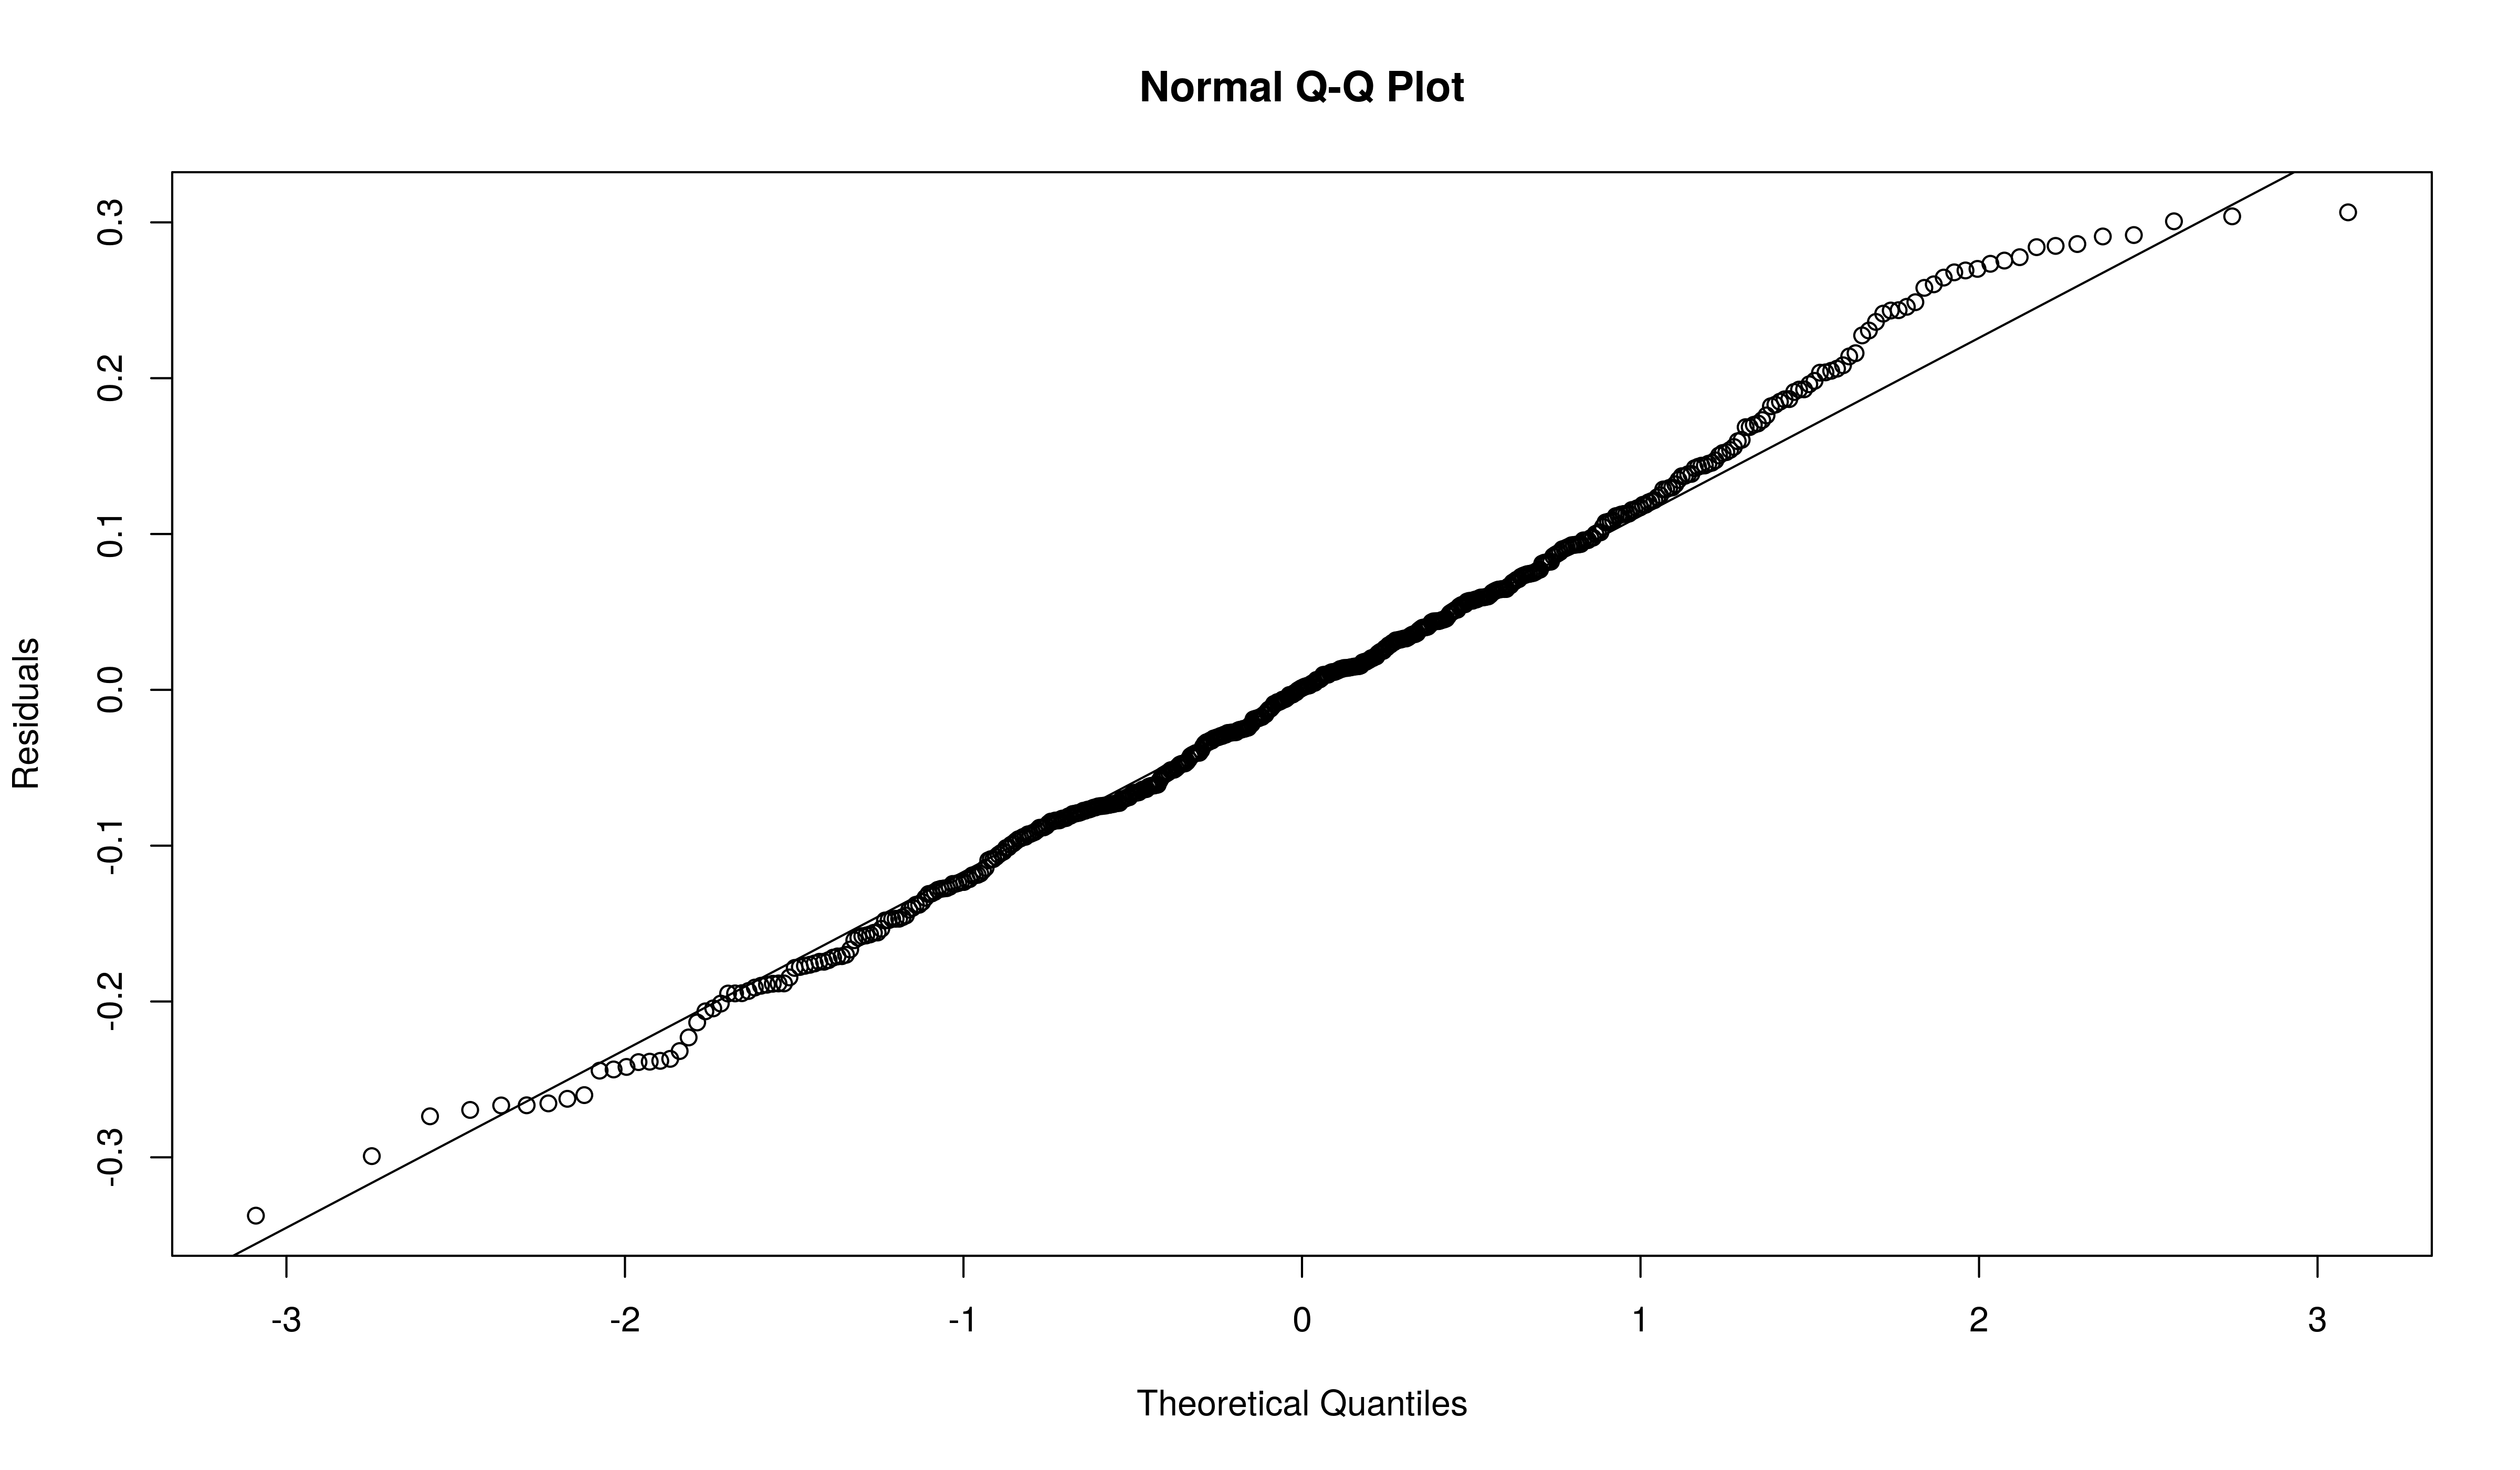

In [26]:
qqnorm(residuals(mrt.lm), ylab="Residuals")
qqline(residuals(mrt.lm))

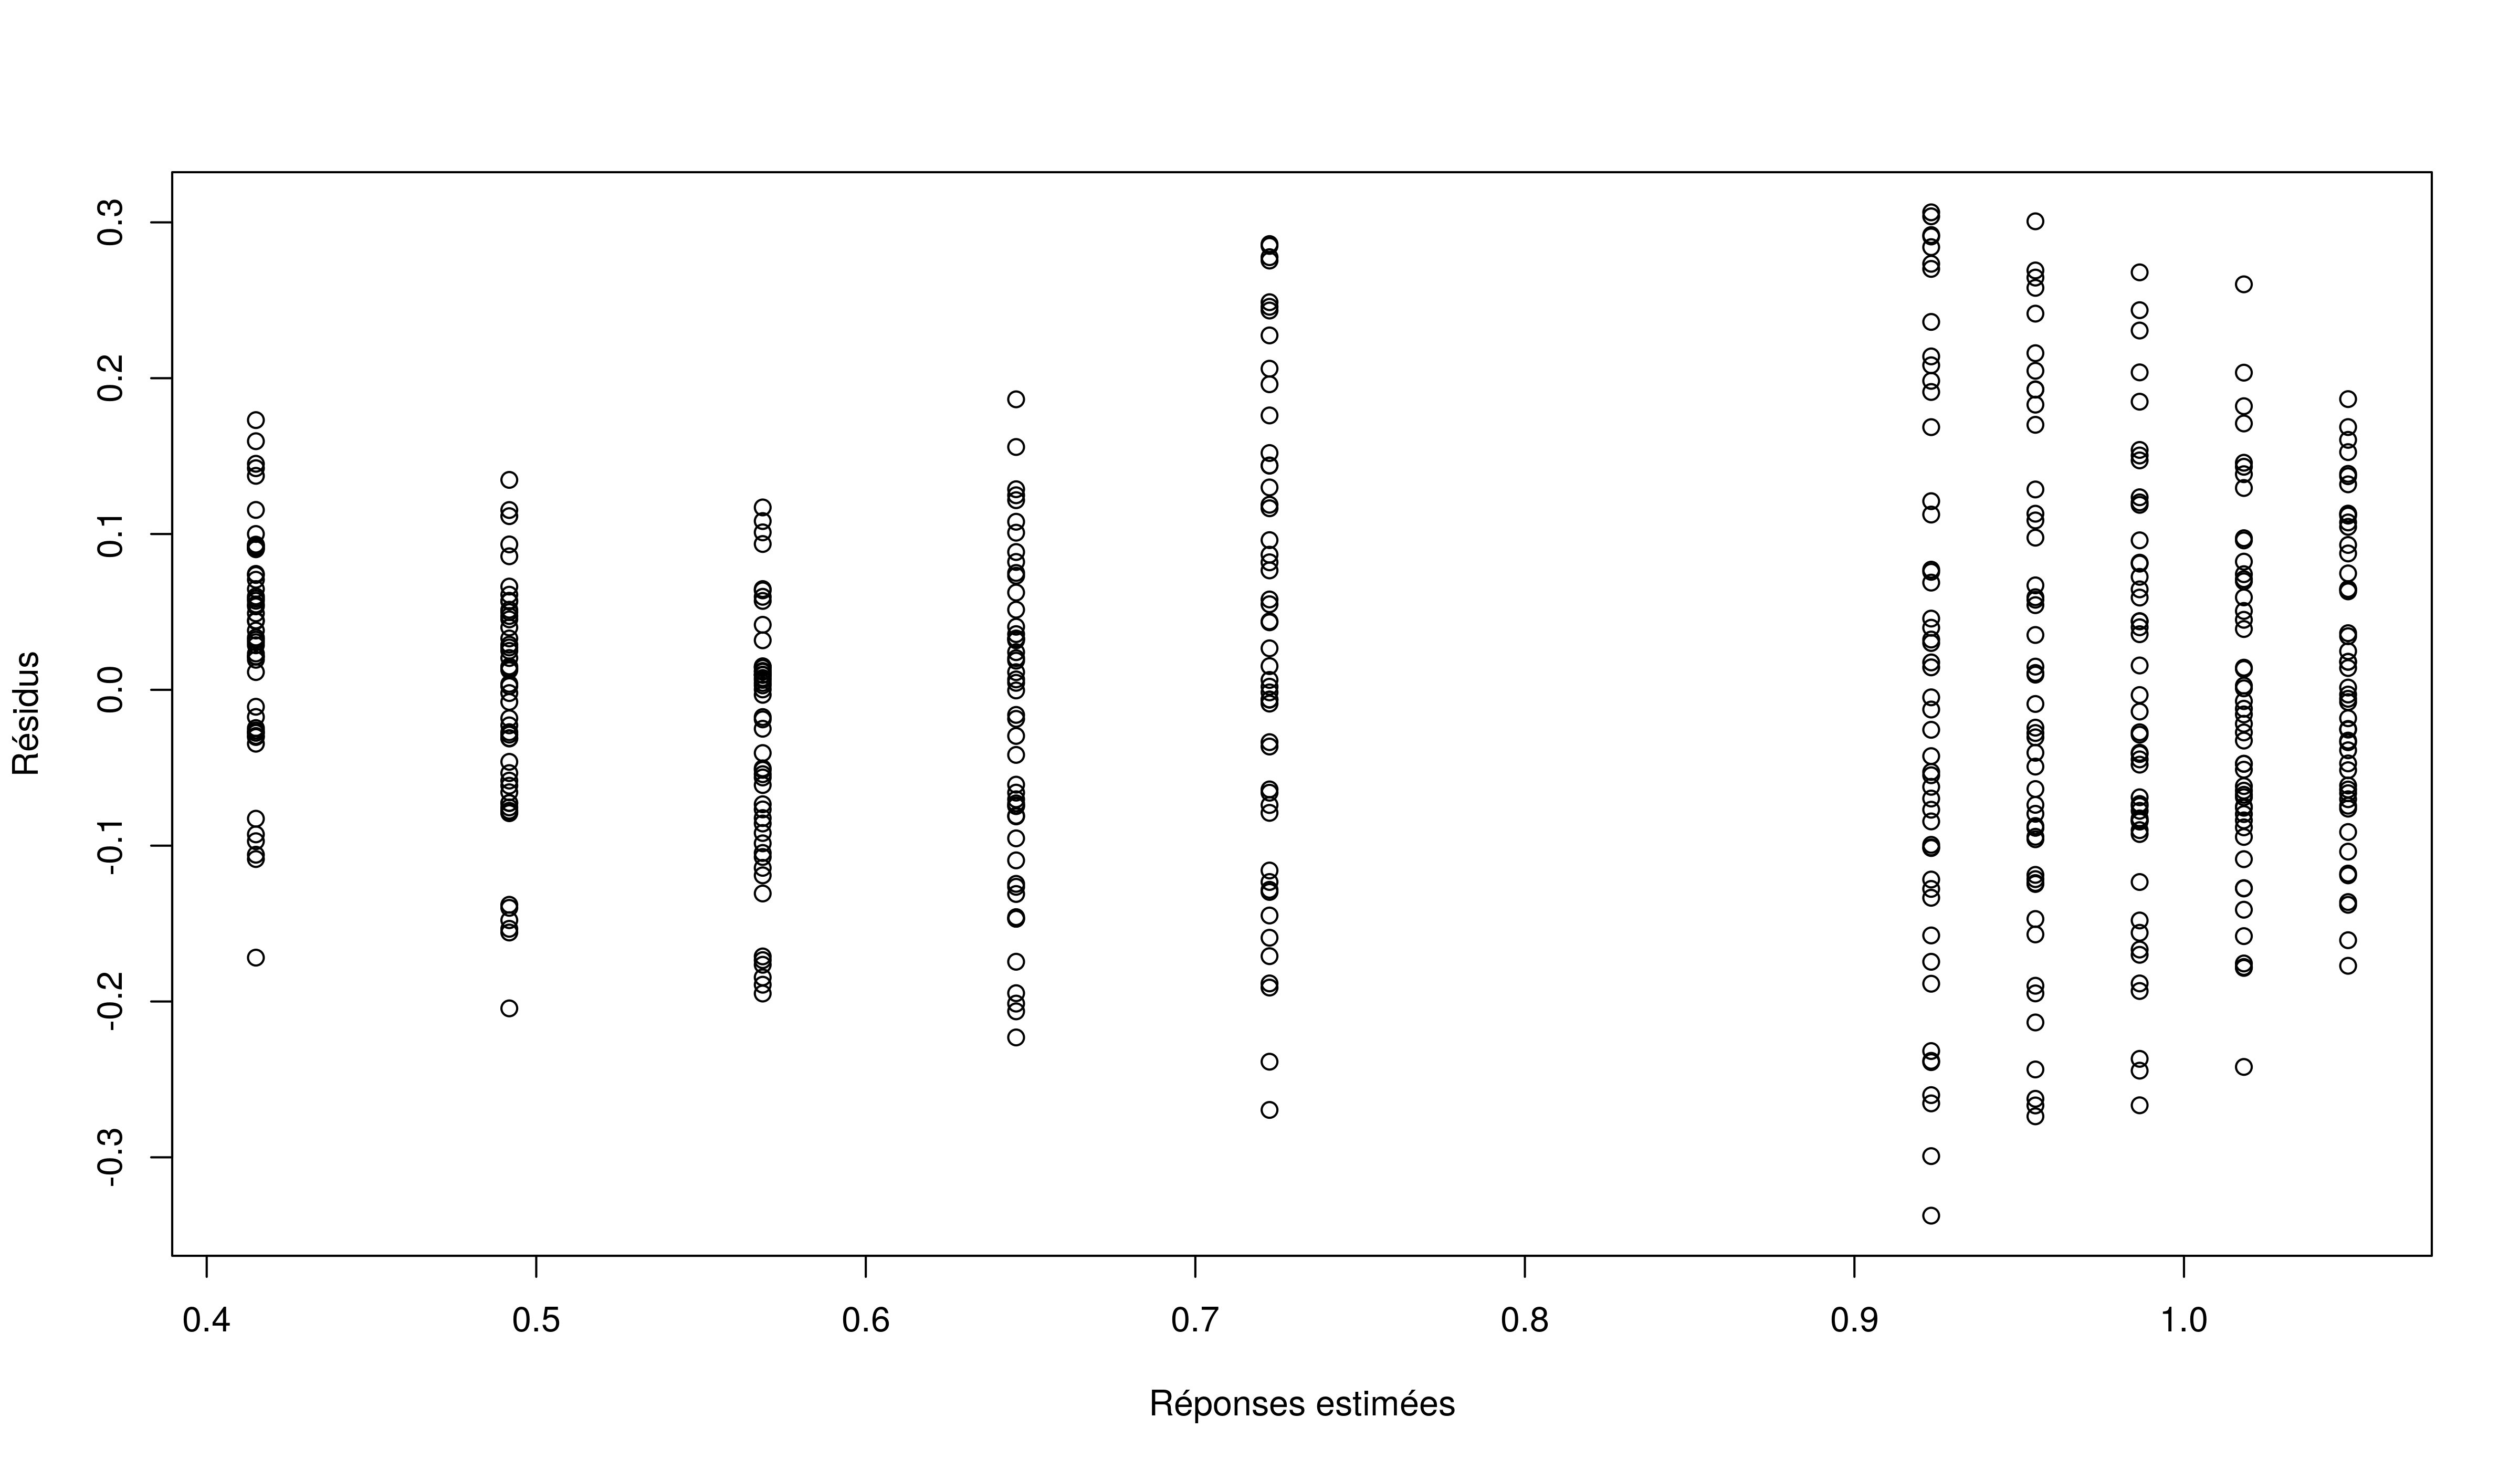

In [27]:
plot(fitted(mrt.lm),resid(mrt.lm),main="",xlab="Réponses estimées",ylab="Résidus")

# Exercice 

- Reproduce the linear model with interaction by prealably transforming the RT to log(RT), knowing that the R command for log-transform is log(x) where x is the variable of interest
- Reproduce the linear model with interaction but by changing the coding of easiness and taking the first modality as the reference condition